In [2]:
import imutils
from PIL import Image, ImageEnhance
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utilities import *

N_ANGLE_BINS = 40
BIN_SIZE = 360 // N_ANGLE_BINS
LEG_LENGTH = 25


In [13]:

def get_hinge_features(img):


    bw_image = threshold_image(img)
    contours, _ = cv2.findContours(bw_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    hist = np.zeros((N_ANGLE_BINS, N_ANGLE_BINS))
        
    # print([len(cnt) for cnt in contours])
    for cnt in contours:
        n_pixels = len(cnt)
        if n_pixels <= LEG_LENGTH:
            continue
        
        points = np.array([point[0] for point in cnt])
        xs, ys = points[:, 0], points[:, 1]
        point_1s = np.array([cnt[(i + LEG_LENGTH) % n_pixels][0] for i in range(n_pixels)])
        point_2s = np.array([cnt[(i - LEG_LENGTH) % n_pixels][0] for i in range(n_pixels)])
        x1s, y1s = point_1s[:, 0], point_1s[:, 1]
        x2s, y2s = point_2s[:, 0], point_2s[:, 1]
        
        phi_1s = np.degrees(np.arctan2(y1s - ys, x1s - xs) + np.pi)
        phi_2s = np.degrees(np.arctan2(y2s - ys, x2s - xs) + np.pi)
        
        indices = np.where(phi_2s > phi_1s)[0]
        
        for i in indices:
            phi1 = int(phi_1s[i] // BIN_SIZE) % N_ANGLE_BINS
            phi2 = int(phi_2s[i] // BIN_SIZE) % N_ANGLE_BINS
            hist[phi1, phi2] += 1
            
    normalised_hist = hist / np.sum(hist)
    feature_vector = normalised_hist[np.triu_indices_from(normalised_hist, k = 1)]
    
    return feature_vector


In [14]:
females_A = []
for filename in os.listdir("data/Females"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Females/" + filename)
        hinge_feature = get_hinge_features(img)
        females_A.append(hinge_feature)
print(females_A[0])

[2.44815165e-04 1.74867975e-03 1.29402301e-03 6.64498304e-04
 1.36397020e-03 9.09313468e-04 1.29402301e-03 1.53883818e-03
 1.04920785e-03 1.88857413e-03 1.25904942e-03 1.32899661e-03
 9.44287063e-04 5.24603924e-04 7.34445494e-04 1.01423425e-03
 6.29524709e-04 3.14762354e-04 2.79788759e-04 1.01423425e-03
 3.49735949e-04 1.74867975e-04 6.99471899e-05 6.99471899e-05
 1.74867975e-04 1.74867975e-04 2.44815165e-04 6.29524709e-04
 3.49735949e-04 5.24603924e-04 2.09841570e-04 6.99471899e-05
 3.14762354e-04 1.04920785e-04 1.04920785e-04 6.99471899e-05
 3.49735949e-05 2.79788759e-04 1.39894380e-04 6.99471899e-04
 1.22407582e-03 8.39366278e-04 1.22407582e-03 8.39366278e-04
 7.34445494e-04 1.85360053e-03 1.15412863e-03 1.57381177e-03
 1.15412863e-03 1.67873256e-03 9.09313468e-04 1.18910223e-03
 1.01423425e-03 8.04392684e-04 6.99471899e-04 5.24603924e-04
 3.14762354e-04 9.09313468e-04 5.94551114e-04 4.54656734e-04
 2.09841570e-04 1.74867975e-04 3.49735949e-04 3.49735949e-04
 7.69419089e-04 4.546567

In [12]:
print(len(females_A[130]))

780


In [15]:
males_A = []
for filename in os.listdir("data/Males"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Males/" + filename)
        hinge_feature = get_hinge_features(img)
        males_A.append(hinge_feature)
print(males_A[0])

[2.27036845e-04 2.33523612e-03 1.58925791e-03 1.03788272e-03
 1.68655942e-03 1.88116243e-03 1.71899325e-03 1.45952257e-03
 9.08147379e-04 1.20005189e-03 9.08147379e-04 8.10845874e-04
 7.45978204e-04 4.86507525e-04 6.81110535e-04 3.24338350e-04
 4.54073690e-04 4.21639855e-04 3.56772185e-04 2.59470680e-04
 9.73015049e-05 0.00000000e+00 1.62169175e-04 1.94603010e-04
 2.59470680e-04 3.24338350e-05 3.24338350e-05 3.24338350e-05
 1.62169175e-04 3.24338350e-05 3.24338350e-05 3.24338350e-05
 1.94603010e-04 1.94603010e-04 1.29735340e-04 6.48676700e-05
 1.94603010e-04 3.24338350e-05 1.29735340e-04 5.83809030e-04
 1.78386092e-03 1.10275039e-03 1.81629476e-03 1.32978723e-03
 1.68655942e-03 1.84872859e-03 1.32978723e-03 2.36766995e-03
 1.71899325e-03 1.29735340e-03 1.36222107e-03 1.13518422e-03
 1.10275039e-03 7.78412039e-04 1.07031655e-03 1.10275039e-03
 1.03788272e-03 8.75713544e-04 1.94603010e-04 1.62169175e-04
 2.91904515e-04 1.94603010e-04 1.29735340e-04 3.24338350e-05
 1.29735340e-04 1.946030

In [16]:
import matplotlib.pyplot as pp



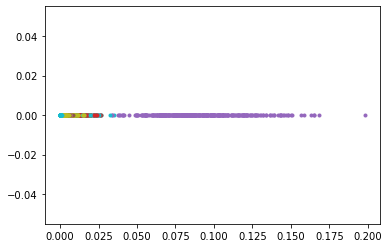

In [17]:
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = males_A # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')
ar = females_A # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')

pp.show()
